In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

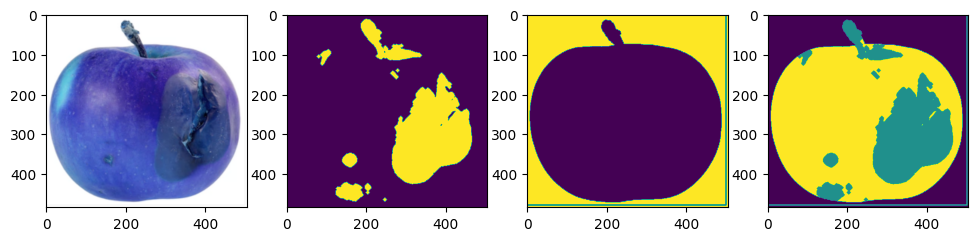

In [4]:
img = cv2.imread('dataset/test/01.png')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# denoise colored image and its HSV version
img_denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
img_hsv_denoised = cv2.fastNlMeansDenoisingColored(img_hsv, None, 10, 10, 7, 21)

# thresholding to extract background mask
_, background_mask = cv2.threshold(img_gray, 10, 255, cv2.THRESH_BINARY)

# thresholding to extract fruit mask
_, fruit_mask = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY)

# define lower and upper bounds for rotten brown parts
rotten_brown_lower = np.array([5, 10, 10])
rotten_brown_upper = np.array([150, 255, 180])

# define lower and upper bounds for rotten green parts
rotten_green_lower = np.array([26, 79, 79])
rotten_green_upper = np.array([150, 199, 192])

# define lower and upper bounds for rotten white parts
rotten_white_lower = np.array([230, 250, 250])
rotten_white_upper = np.array([253, 250, 250])

# create mask for the rotten part
rotten_brown_mask = cv2.inRange(img_hsv_denoised, rotten_brown_lower, rotten_brown_upper)
rotten_green_mask = cv2.inRange(img_hsv_denoised, rotten_green_lower, rotten_green_upper)
rotten_white_mask = cv2.inRange(img_hsv_denoised, rotten_white_lower, rotten_white_upper)

# morphological operations to refine the mask
rotten_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
rotten_brown_mask = cv2.erode(rotten_brown_mask, rotten_kernel, iterations=1)
rotten_brown_mask = cv2.dilate(rotten_brown_mask, rotten_kernel, iterations=5)

rotten_green_mask = cv2.erode(rotten_green_mask, rotten_kernel, iterations=1)
rotten_green_mask = cv2.dilate(rotten_green_mask, rotten_kernel, iterations=5)

rotten_white_mask = cv2.erode(rotten_white_mask, rotten_kernel, iterations=1)
rotten_white_mask = cv2.dilate(rotten_white_mask, rotten_kernel, iterations=5)

# create a copy of the hsv image
outImg = img_hsv.copy()

# combine the masks for all rotten regions using a bitwise OR operation
mask_combined = cv2.bitwise_or(rotten_brown_mask, cv2.bitwise_or(rotten_green_mask, rotten_white_mask))
# apply the combined mask to the output image using a bitwise AND operation
outImg = cv2.bitwise_and(outImg, outImg, mask=mask_combined)
# convert the resulting image to grayscale
outImg = cv2.cvtColor(outImg, cv2.COLOR_RGB2GRAY)

# intensity mapping
outImg[np.where(background_mask)] = [2]
outImg[np.where(mask_combined)] = [1]
outImg[np.where(fruit_mask)] = [0]

plt.figure(figsize=(15,5))
plt.subplot(151), plt.imshow(img)
plt.subplot(152), plt.imshow(mask_combined)
plt.subplot(153), plt.imshow(fruit_mask)
plt.subplot(154), plt.imshow(outImg)
plt.show()

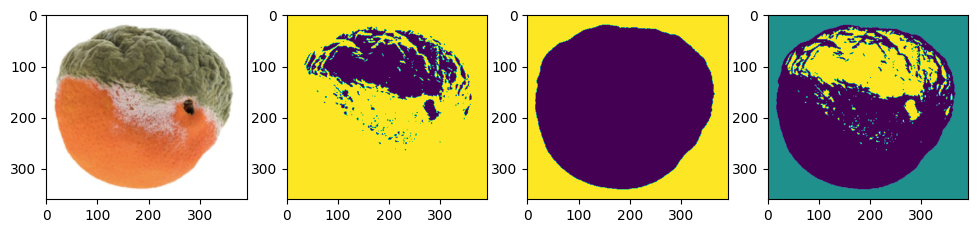

In [12]:
### backup
img = cv2.imread('dataset/test/78.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
# Convert to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Thresholding to segment out the rotten part
_, rotten_mask = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed

# Thresholding to segment out the fruit
_, fruit_mask = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed

# Combine the masks
mask = np.zeros_like(fruit_mask)
mask[(fruit_mask == 255) & (rotten_mask == 0)] = 1  # Background
mask[(fruit_mask == 255) & (rotten_mask == 255)] = 2  # Fruit
mask[(fruit_mask == 0) & (rotten_mask == 0)] = 3  # Rotten part

# Convert mask to the specified format
outImg = np.zeros_like(mask, dtype=np.uint8)
 # Background
 # Fruit (red)
outImg[mask == 3] = 2  # Rotten part (blue)
outImg[mask == 2] = 1 
outImg[mask == 1] = 0 

plt.figure(figsize=(15,5))
plt.subplot(151), plt.imshow(img_rgb)
plt.subplot(152), plt.imshow(rotten_mask)
plt.subplot(153), plt.imshow(fruit_mask)
plt.subplot(154), plt.imshow(outImg)
plt.show()

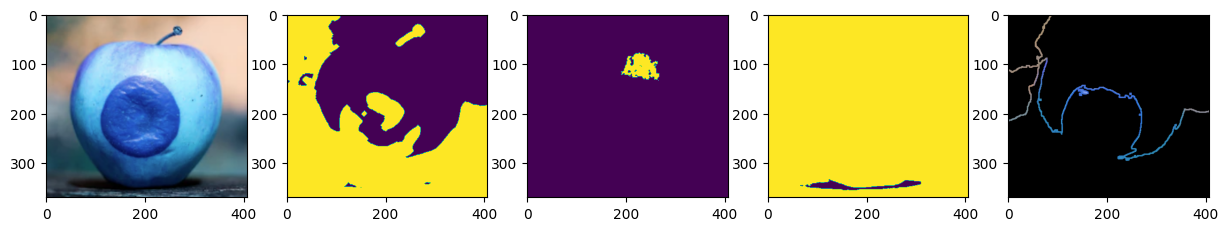

In [11]:
img = cv2.imread('add_dataset/test/04.png')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# denoise colored image and its HSV version
img_denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
img_hsv_denoised = cv2.fastNlMeansDenoisingColored(img_hsv, None, 10, 10, 7, 21)

_,thresh = cv2.threshold(img_gray, np.mean(img_gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros_like(img_gray)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

dst = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# thresholding to extract background mask
_, background_mask = cv2.threshold(img_gray, 10, 255, cv2.THRESH_BINARY)

# thresholding to extract fruit mask
_, fruit_mask = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY)

# define lower and upper bounds for rotten brown parts
rotten_brown_lower = np.array([5, 10, 10])
rotten_brown_upper = np.array([150, 255, 180])

# define lower and upper bounds for rotten green parts
rotten_green_lower = np.array([26, 79, 79])
rotten_green_upper = np.array([150, 199, 192])

# define lower and upper bounds for rotten white parts
rotten_white_lower = np.array([230, 250, 250])
rotten_white_upper = np.array([253, 250, 250])

# create mask for the rotten part
rotten_brown_mask = cv2.inRange(img_hsv_denoised, rotten_brown_lower, rotten_brown_upper)
rotten_green_mask = cv2.inRange(img_hsv_denoised, rotten_green_lower, rotten_green_upper)
rotten_white_mask = cv2.inRange(img_hsv_denoised, rotten_white_lower, rotten_white_upper)

# morphological operations to refine the mask
rotten_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
rotten_brown_mask = cv2.erode(rotten_brown_mask, rotten_kernel, iterations=1)
rotten_brown_mask = cv2.dilate(rotten_brown_mask, rotten_kernel, iterations=5)

rotten_green_mask = cv2.erode(rotten_green_mask, rotten_kernel, iterations=1)
rotten_green_mask = cv2.dilate(rotten_green_mask, rotten_kernel, iterations=5)

rotten_white_mask = cv2.erode(rotten_white_mask, rotten_kernel, iterations=1)
rotten_white_mask = cv2.dilate(rotten_white_mask, rotten_kernel, iterations=5)

# create a copy of the hsv image
outImg = img_hsv.copy()

# combine the masks for all rotten regions using a bitwise OR operation
mask_combined = cv2.bitwise_or(rotten_brown_mask, cv2.bitwise_or(rotten_green_mask, rotten_white_mask))
# apply the combined mask to the output image using a bitwise AND operation
outImg = cv2.bitwise_and(outImg, outImg, mask=mask_combined)
# convert the resulting image to grayscale
outImg = cv2.cvtColor(outImg, cv2.COLOR_RGB2GRAY)

# intensity mapping
outImg[np.where(background_mask)] = [2]
outImg[np.where(mask_combined)] = [1]
outImg[np.where(fruit_mask)] = [0]

plt.figure(figsize=(15,5))
plt.subplot(151), plt.imshow(img)
plt.subplot(152), plt.imshow(mask_combined)
plt.subplot(153), plt.imshow(fruit_mask)
plt.subplot(154), plt.imshow(background_mask)
plt.subplot(155), plt.imshow(segmented)
plt.show()